# Assignment Setup

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [25]:
# Define the directory where the CSV files are located.
directory = '/workspaces/07-visualization-irisk2050/ddf--datapoints--population--by--country--age--gender--year'  # Adjust this path as needed

# Initialize an empty dictionary to store the dataframes.
data = {}

# Print the list of files in the directory.
files = os.listdir(directory)
### print(f"Found {len(files)} files in the directory.")

# Loop through the files in the directory.
for filename in files:
    ### print(f"Processing file: {filename}")
    
    if filename.endswith(".csv") and 'ddf--datapoints--population--by--country' in filename:
        try:
            # Extract the country abbreviation from the filename
            country_abbrev = filename.split('--')[4][-3:]
            ### print(country_abbrev)
            
            # Construct the full file path
            filepath = os.path.join(directory, filename)
            
            # Read the CSV file into a dataframe
            df = pd.read_csv(filepath)
            
            # Add a new column for the country abbreviation
            df['country'] = country_abbrev
            
            # Store the dataframe in the dictionary, using country abbreviation as key
            data[country_abbrev] = df
        except Exception as e:
            print(f"Error processing file {filename}: {e}")

# Check how many dataframes were loaded.
### print(f"Loaded dataframes for {len(data)} countries.")

# Combine all dataframes into one.
combined_df = pd.concat(data.values(), ignore_index=True)

combined_df.head()

,country,age,gender,year,population
0,syr,0,1,1950,74408
1,syr,0,1,1951,77115
2,syr,0,1,1952,79953
3,syr,0,1,1953,82811
4,syr,0,1,1954,85767


# Part 1: Matplotlib

## 1. Create a line plot comparing total population over time:
   - Choose 5 countries
   - Calculate the total population by country for each year
   - Create a line plot showing population trends
   - Include a legend identifying each country
   - Add appropriate axis labels and title
   - Use different line styles or colors to distinguish the countries

In [35]:
### print(sorted(combined_df['country'].unique()))
# selected 5 countries: 'esp', 'fin', 'fra', 'sgp', 'usa'

# Calculate the total population by country for each year
filtered5 = combined_df[combined_df['country'].isin(['esp', 'fra', 'fin', 'sgp', 'usa'])]
# filtered5['country'].unique()

yearly_total = filtered5.groupby(['country', 'year'])['population'].sum().reset_index()
yearly_total

,country,year,population
0,esp,1950,28077051
1,esp,1951,28214867
2,esp,1952,28406045
3,esp,1953,28632702
4,esp,1954,28857829
...,...,...,...
750,usa,2096,418800087
751,usa,2097,419461007
752,usa,2098,420095822
753,usa,2099,420702881


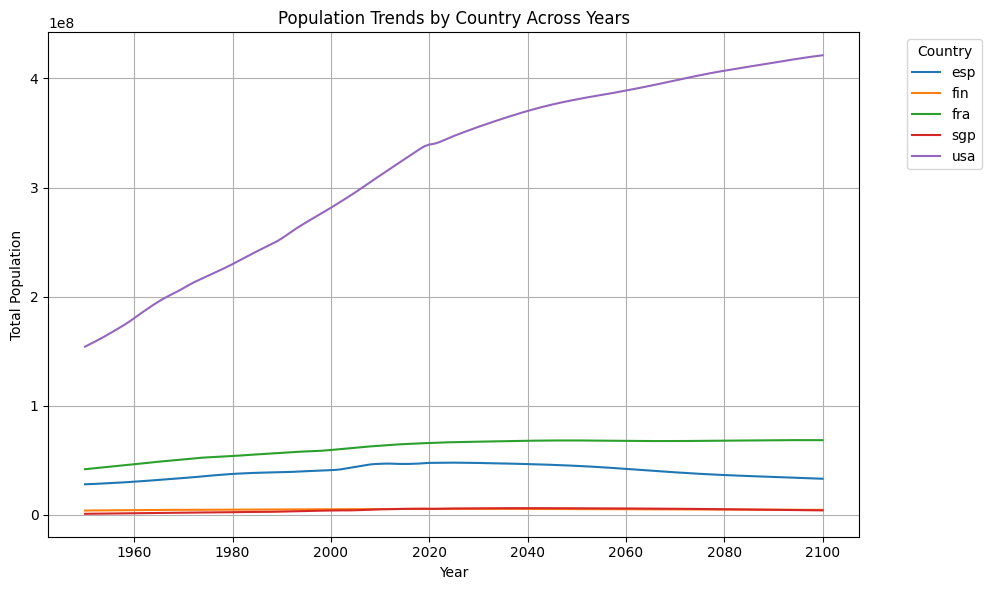

In [44]:
# Create a figure and axis object.
plt.figure(figsize=(10, 6))

# Plot population trends for each country.
for c in yearly_total['country'].unique():
    # Filter the data for the current country
    country_data = yearly_total[yearly_total['country'] == c]
    
    # Plot the data (using different styles/colors automatically)
    plt.plot(country_data['year'], country_data['population'], label = c)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Total Population')
plt.title('Population Trends by Country Across Years')

# Add a legend to identify each country
plt.legend(title = 'Country', bbox_to_anchor = (1.05, 1), loc = 'upper left')

# Display the plot
plt.tight_layout()  # Adjust layout so that everything fits
plt.grid() # Add grid lines for readability
plt.show()

## 2. Investigate demographic shifts using a stacked bar chart:
   - Compare age distributions (0-14, 15-30, 31-45, 46-65, 66+) between 1950, 1985, and 2020
   - Create a stacked bar chart showing these changes
   - Calculate and display the percentage for each age group
   - Add text annotations showing key percentages
   - Include clear labels and a legend

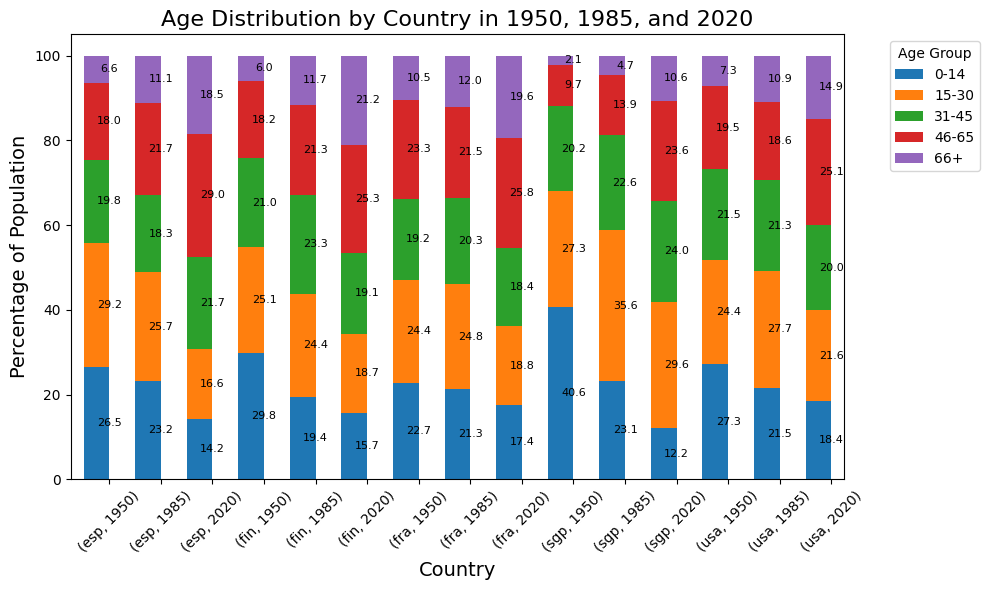

In [63]:
def categorize_age(age):
    if age <= 14:
        return '0-14'
    elif age <= 30:
        return '15-30'
    elif age <= 45:
        return '31-45'
    elif age <= 65:
        return '46-65'
    else:
        return '66+'

filtered5.loc[:, 'age_group'] = filtered5['age'].apply(categorize_age)

# Filter for the years of interest.
years_of_interest = [1950, 1985, 2020]
filtered_years = filtered5[filtered5['year'].isin(years_of_interest)]

# Group by country, year, and age group, then sum populations.
age_distribution = filtered_years.groupby(['country', 'year', 'age_group'])['population'].sum().unstack(fill_value=0)

# Calculate percentages for each age group.
age_distribution_percentage = age_distribution.div(age_distribution.sum(axis=1), axis=0) * 100

# Create a DataFrame for plotting, ensuring the countries are in the same order for each year
# Extract the unique countries and ensure the same order across years
countries_order = age_distribution.index.unique()

# Reindex the DataFrame to ensure the same order of countries for each year
age_distribution_percentage = age_distribution_percentage.reindex(countries_order)

# Create a stacked bar chart grouped by year
ax = age_distribution_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), position=1)

# Add labels and title
plt.title('Age Distribution by Country in 1950, 1985, and 2020', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Percentage of Population', fontsize=14)
plt.xticks(rotation=45)

# Add percentage annotations rounded to one decimal place with white color
for i, country in enumerate(age_distribution_percentage.index):
    row = age_distribution_percentage.loc[country]  # Get the row as a Series
    y_values = row.cumsum()  # Cumulative sum for positioning
    for j in range(len(row)):
        value = row.iloc[j]  # Use iloc to access by position
        # Calculate the position for annotation
        y_value = y_values.iloc[j] - value / 2
        # Round the value for annotation
        percentage_text = f"{value:.1f}"
        plt.text(i, y_value, percentage_text, ha='center', va='center', fontsize=8)

# Move the legend outside the plot to the upper right
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()  # Adjust layout to fit everything
plt.show()


In [ ]:
### filtered5['age'].unique()
### filtered5.dtypes
### max(filtered5['age'])

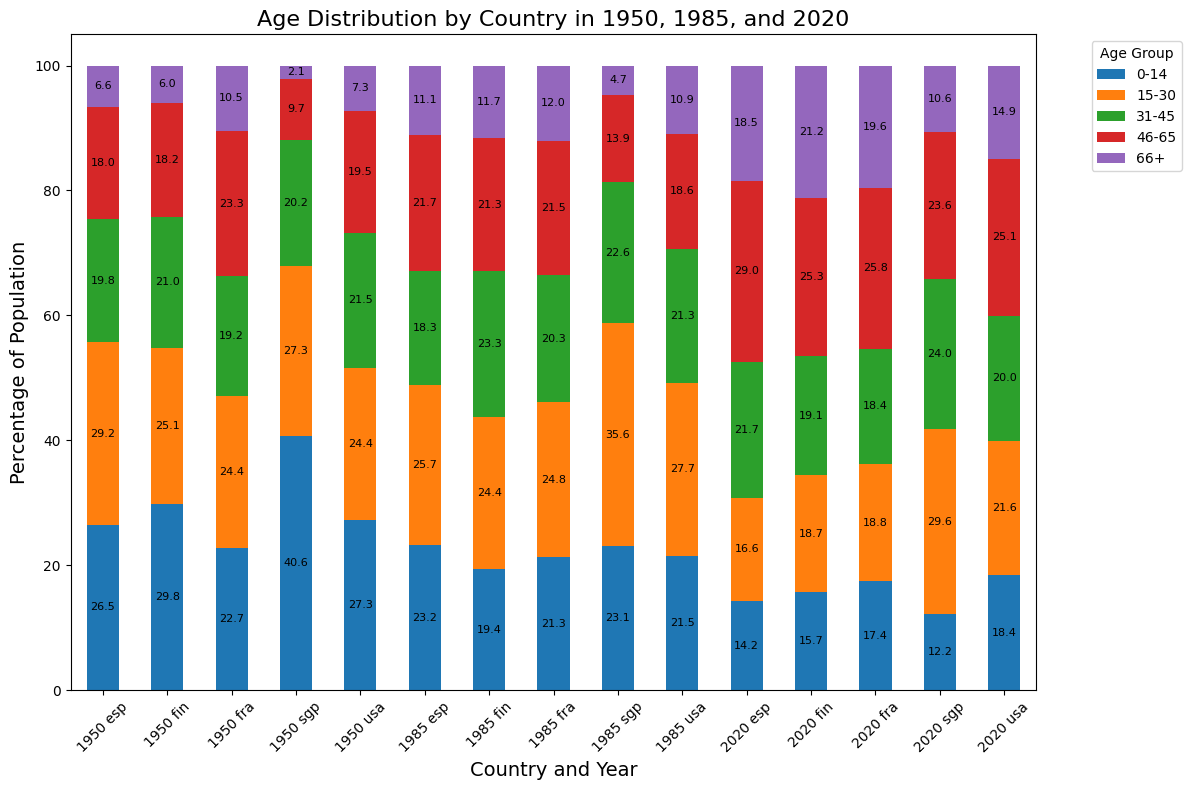

In [73]:
def categorize_age(age):
    if age <= 14:
        return '0-14'
    elif age <= 30:
        return '15-30'
    elif age <= 45:
        return '31-45'
    elif age <= 65:
        return '46-65'
    else:
        return '66+'

# Apply age categorization with .loc to avoid SettingWithCopyWarning
filtered5.loc[:, 'age_group'] = filtered5['age'].apply(categorize_age)

# Filter for the years of interest
years_of_interest = [1950, 1985, 2020]
filtered_years = filtered5[filtered5['year'].isin(years_of_interest)]

# Group by year and country, summing populations by age group
age_distribution = filtered_years.groupby(['year', 'country', 'age_group'])['population'].sum().unstack(fill_value=0)

# Calculate percentages for each age group
age_distribution_percentage = age_distribution.div(age_distribution.sum(axis=1), axis=0) * 100

# Reorder the index to ensure years are grouped together with countries in the specified order
countries_order = ['esp', 'fin', 'fra', 'sgp', 'usa']  # Ensure this list has the countries in the desired order
age_distribution_percentage = age_distribution_percentage.reindex(
    pd.MultiIndex.from_product([years_of_interest, countries_order], names=['year', 'country']),
    fill_value=0
)

# Create a stacked bar chart
ax = age_distribution_percentage.plot(kind='bar', stacked=True, figsize=(12, 8))

# Add labels and title
plt.title('Age Distribution by Country in 1950, 1985, and 2020', fontsize=16)
plt.xlabel('Country and Year', fontsize=14)
plt.ylabel('Percentage of Population', fontsize=14)

# Create custom x-tick labels
xticks_labels = [f"{year} {country}" for year in years_of_interest for country in countries_order]
plt.xticks(ticks=range(len(xticks_labels)), labels=xticks_labels, rotation=45)

# Add percentage annotations rounded to one decimal place
for i, (year, country) in enumerate(age_distribution_percentage.index):
    row = age_distribution_percentage.loc[(year, country)]  # Get the row as a Series
    y_values = row.cumsum()  # Cumulative sum for positioning
    for j in range(len(row)):
        value = row.iloc[j]  # Use iloc to access by position
        # Calculate the position for annotation
        y_value = y_values.iloc[j] - value / 2
        # Round the value for annotation
        percentage_text = f"{value:.1f}"
        plt.text(i, y_value, percentage_text, ha='center', va='center', fontsize=8)

# Move the legend outside the plot to the upper right
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()  # Adjust layout to fit everything
plt.show()
